In [15]:
import pandas as pd
import numpy as np
from transformers import AutoTokenizer

/Users/pingzhili/anaconda3/envs/ajax/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
/Users/pingzhili/anaconda3/envs/ajax/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [55]:
sjdf = pd.read_parquet("../data/evals/Qwen/Qwen3-32B-self-judge/details/Qwen/Qwen3-32B/2025-07-14T11-58-54.309709/details_lighteval|aime24|0_2025-07-14T11-58-54.309709.parquet")
tdf = pd.read_parquet("../data/evals/Qwen/Qwen3-32B-thinking/details/Qwen/Qwen3-32B/2025-07-14T12-14-40.446749/details_lighteval|aime24|0_2025-07-14T12-14-40.446749.parquet")

In [56]:
sjdf_acc = sjdf.metric.map(lambda x: x['math_pass@1:1_samples']).tolist()

In [57]:
tdf_acc = tdf.metric.map(lambda x: x['math_pass@1:1_samples']).tolist()

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Anthropic-inspired color palette
ANTHROPIC_ORANGE = '#D97757'
ANTHROPIC_LIGHT = '#FFF4F0'
ANTHROPIC_DARK = '#1F1F1F'
ANTHROPIC_GRAY = '#666666'

def create_anthropic_colormap():
    """Create a custom colormap inspired by Anthropic's colors."""
    colors = [
        (1.0, 0.95, 0.94),  # Very light peach (low values)
        (1.0, 0.85, 0.80),  # Light peach
        (0.85, 0.47, 0.34),  # Anthropic orange (high values)
    ]
    n_bins = 100
    cmap_name = 'anthropic'
    return LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

def set_anthropic_style():
    """Set matplotlib style to match Anthropic's aesthetic."""
    plt.rcParams.update({
        'font.family': 'sans-serif',
        'font.sans-serif': ['Arial', 'Helvetica', 'DejaVu Sans'],
        'font.size': 11,
        'axes.labelsize': 12,
        'axes.titlesize': 14,
        'axes.titleweight': 'normal',
        'axes.edgecolor': ANTHROPIC_GRAY,
        'axes.linewidth': 0.8,
        'grid.alpha': 0.3,
        'grid.color': ANTHROPIC_GRAY,
    })

def plot_accuracy_comparison(sjdf_acc, tdf_acc, figsize=(12, 2)):
    """
    Create a 2×N heatmap comparing question-wise accuracy between two methods.
    Uses Anthropic's visual style.

    Parameters:
    -----------
    sjdf_acc : list or array
        Accuracy values for SJDF method
    tdf_acc : list or array
        Accuracy values for TDF method
    figsize : tuple
        Figure size (width, height)

    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    # Set Anthropic style
    set_anthropic_style()

    # Convert to numpy arrays if needed
    sjdf_acc = np.array(sjdf_acc)
    tdf_acc = np.array(tdf_acc)

    # Verify same length
    assert len(sjdf_acc) == len(tdf_acc), "Both accuracy lists must have the same length"

    # Create 2×N array for heatmap
    accuracy_matrix = np.vstack([sjdf_acc, tdf_acc])

    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize, facecolor='white')

    # Create custom colormap
    anthropic_cmap = create_anthropic_colormap()

    # Create heatmap
    sns.heatmap(accuracy_matrix,
                annot=False,
                cmap=anthropic_cmap,
                vmin=0, vmax=1,
                cbar_kws={
                    'orientation': 'vertical',
                    'ticks': [0.25, 0.75],
                    'pad': 0.02
                },
                xticklabels=[f'Q{i+1}' for i in range(len(sjdf_acc))],
                yticklabels=['Self-Judge + Adaptive', 'Always Thinking'],
                ax=ax,
                linewidths=1,
                linecolor='white',
                square=False)

    # Customize colorbar
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=10, color=ANTHROPIC_GRAY)
    cbar.ax.yaxis.label.set_color(ANTHROPIC_DARK)
    cbar.outline.set_edgecolor(ANTHROPIC_GRAY)
    cbar.ax.set_yticklabels(['False', 'True'])

    # set yticklabels to rotate 90'
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

    # Set labels and title
    ax.set_xlabel('Questions', fontsize=12, color=ANTHROPIC_DARK)
    ax.set_ylabel('Methods', fontsize=12, color=ANTHROPIC_DARK)
    ax.set_title("AIME'24",
                 fontsize=14, color=ANTHROPIC_DARK, pad=20)

    # Style tick labels
    ax.tick_params(colors=ANTHROPIC_DARK, which='both')

    # Rotate x-axis labels if many questions
    if len(sjdf_acc) > 15:
        plt.xticks(rotation=45, ha='right')

    # Remove top and right spines for cleaner look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()

    return fig, ax

(<Figure size 1200x200 with 2 Axes>,
 <Axes: title={'center': "AIME'24"}, xlabel='Questions', ylabel='Methods'>)

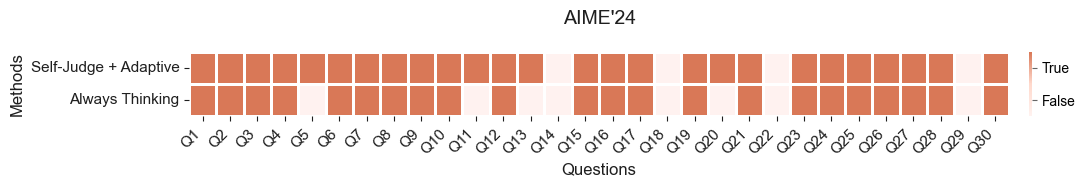

In [68]:
plot_accuracy_comparison(sjdf_acc, tdf_acc)

In [59]:
sjdf.metric

0     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
1     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
2     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
3     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
4     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
5     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
6     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
7     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
8     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
9     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
10    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
11    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
12    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
13    {'math_pass@1:1_samples': 0.0, 'self_judged_th...
14    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
15    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
16    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
17    {'math_pass@1:1_samples': 0.0, 'self_judge

In [66]:
tdf.metric

0     {'math_pass@1:1_samples': 1.0}
1     {'math_pass@1:1_samples': 1.0}
2     {'math_pass@1:1_samples': 1.0}
3     {'math_pass@1:1_samples': 1.0}
4     {'math_pass@1:1_samples': 0.0}
5     {'math_pass@1:1_samples': 1.0}
6     {'math_pass@1:1_samples': 1.0}
7     {'math_pass@1:1_samples': 1.0}
8     {'math_pass@1:1_samples': 1.0}
9     {'math_pass@1:1_samples': 1.0}
10    {'math_pass@1:1_samples': 0.0}
11    {'math_pass@1:1_samples': 1.0}
12    {'math_pass@1:1_samples': 0.0}
13    {'math_pass@1:1_samples': 0.0}
14    {'math_pass@1:1_samples': 1.0}
15    {'math_pass@1:1_samples': 1.0}
16    {'math_pass@1:1_samples': 1.0}
17    {'math_pass@1:1_samples': 0.0}
18    {'math_pass@1:1_samples': 1.0}
19    {'math_pass@1:1_samples': 0.0}
20    {'math_pass@1:1_samples': 1.0}
21    {'math_pass@1:1_samples': 0.0}
22    {'math_pass@1:1_samples': 1.0}
23    {'math_pass@1:1_samples': 1.0}
24    {'math_pass@1:1_samples': 1.0}
25    {'math_pass@1:1_samples': 1.0}
26    {'math_pass@1:1_samples': 1.0}
2

In [14]:
result_list = [92.115, 91.660]
f"{np.mean(result_list):.2f} (±{np.std(result_list):.2f})"

'91.89 (±0.23)'

In [16]:
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen3-32B")

In [49]:
df = pd.read_parquet('/Users/pingzhili/my-github/lm-reasoning-eval/data/evals/Qwen/Qwen3-32B-self-judge/details/Qwen/Qwen3-32B/2025-07-14T11-58-54.309709/details_lighteval|aime24|0_2025-07-14T11-58-54.309709.parquet')
average_response_length = sum([len(df.model_response[i]['output_tokens'][0]) for i in range(len(df))]) / len(df)
print(average_response_length)

11847.866666666667


In [51]:
df.metric

0     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
1     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
2     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
3     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
4     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
5     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
6     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
7     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
8     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
9     {'math_pass@1:1_samples': 1.0, 'self_judged_th...
10    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
11    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
12    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
13    {'math_pass@1:1_samples': 0.0, 'self_judged_th...
14    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
15    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
16    {'math_pass@1:1_samples': 1.0, 'self_judged_th...
17    {'math_pass@1:1_samples': 0.0, 'self_judge

In [50]:
df.model_response[24]['text'][0]

'We are given:\n\n$$\n\\log_x(y^x) = 10 \\quad \\text{and} \\quad \\log_y(x^{4y}) = 10\n$$\n\nWe are to find $ xy $, where $ x > 1 $, $ y > 1 $.\n\n---\n\n### Step 1: Use logarithmic identities\n\nRecall the logarithmic identity:\n\n$$\n\\log_b(a^c) = c \\log_b(a)\n$$\n\nApply this to the first equation:\n\n$$\n\\log_x(y^x) = x \\log_x(y) = 10 \\quad \\text{(1)}\n$$\n\nApply the same to the second equation:\n\n$$\n\\log_y(x^{4y}) = 4y \\log_y(x) = 10 \\quad \\text{(2)}\n$$\n\n---\n\n### Step 2: Solve for $ \\log_x(y) $ and $ \\log_y(x) $\n\nFrom (1):\n\n$$\nx \\log_x(y) = 10 \\Rightarrow \\log_x(y) = \\frac{10}{x}\n$$\n\nFrom (2):\n\n$$\n4y \\log_y(x) = 10 \\Rightarrow \\log_y(x) = \\frac{10}{4y} = \\frac{5}{2y}\n$$\n\n---\n\n### Step 3: Use the identity $ \\log_b(a) = \\frac{1}{\\log_a(b)} $\n\nWe know:\n\n$$\n\\log_x(y) = \\frac{1}{\\log_y(x)}\n$$\n\nSo equating both expressions:\n\n$$\n\\frac{10}{x} = \\frac{1}{\\frac{5}{2y}} = \\frac{2y}{5}\n$$\n\nNow solve:\n\n$$\n\\frac{10}{x} = 

In [46]:
df_cot = pd.read_parquet('/Users/pingzhili/my-github/lm-reasoning-eval/data/evals/Qwen/Qwen3-32B-thinking/details/Qwen/Qwen3-32B/2025-07-14T10-25-35.204237/details_lighteval|aime24|0_2025-07-14T10-25-35.204237.parquet')

In [52]:
df_cot.model_response[24]['text'][0]

"<think>\nOkay, let's try to tackle this problem. So, we have two equations involving logarithms with variables in both the base and the exponent. The problem says that there are real numbers x and y, both greater than 1, such that log base x of y^x equals 10, and log base y of x^{4y} also equals 10. We need to find the product xy. Alright, let's break this down step by step.\n\nFirst, let me recall the definition of logarithms. Remember that log_b(a) = c means that b^c = a. So, if we have log_x(y^x) = 10, that should translate to x^10 = y^x. Similarly, the second equation log_y(x^{4y}) = 10 would mean that y^10 = x^{4y}. So now we have two equations:\n\n1. x^10 = y^x\n2. y^10 = x^{4y}\n\nOur goal is to find xy. Hmm, okay. Let me write these equations again:\n\nEquation (1): x^10 = y^x\n\nEquation (2): y^10 = x^{4y}\n\nSince both equations involve x and y in exponents, maybe we can take logarithms again to bring down the exponents? Or perhaps express one variable in terms of the other 

In [56]:
df_cot.model_response[10]['text'][0]

"<think>\nOkay, so I need to find the probability that Jen wins the grand prize given that she won a prize. This is a conditional probability problem. Let me recall the formula for conditional probability: P(A|B) = P(A and B)/P(B). But in this case, if A is winning the grand prize and B is winning a prize, then since winning the grand prize is a subset of winning a prize (because if you win the grand prize, you definitely won a prize), then P(A and B) is just P(A). So the formula simplifies to P(A)/P(B). Therefore, I need to calculate two probabilities: the probability of winning the grand prize, and the probability of winning any prize (i.e., at least two numbers matching), and then divide them.\n\nFirst, let me figure out the total number of possible ways the lottery can choose 4 numbers from S, which has 10 numbers. The total number of combinations is C(10,4). Let me compute that. C(10,4) is 10! / (4! * 6!) = (10*9*8*7)/(4*3*2*1) = 210. So there are 210 possible combinations.\n\nJen

In [54]:
df_nt = pd.read_parquet('/Users/pingzhili/my-github/lm-reasoning-eval/data/evals/Qwen/Qwen3-32B-nothinking/details/Qwen/Qwen3-32B/2025-07-14T10-24-30.829412/details_lighteval|aime24|0_2025-07-14T10-24-30.829412.parquet')

In [57]:
df_nt.model_response[10]['text'][0]

'We are given a probability problem involving a lottery where Jen picks **4 distinct numbers** from the set $ S = \\{1, 2, 3, \\ldots, 10\\} $. Then, 4 numbers are randomly selected from the same set. Jen **wins a prize** if **at least 2** of her numbers are among the 4 randomly selected numbers. She **wins the grand prize** if **all 4** of her numbers are selected.\n\nWe are to find the **probability of her winning the grand prize given that she won a prize**, and express it as a reduced fraction $ \\frac{m}{n} $, then find $ m + n $.\n\n---\n\n### Step 1: Total number of ways to choose 4 numbers from 10\n\n$$\n\\binom{10}{4} = 210\n$$\n\nThis is the total number of possible outcomes for the randomly selected 4 numbers.\n\n---\n\n### Step 2: Let’s define events:\n\nLet:\n\n- $ A $: Jen wins the **grand prize** (i.e., her 4 numbers match the 4 randomly selected).\n- $ B $: Jen **wins a prize** (i.e., at least 2 of her numbers are among the 4 selected).\n- We are asked to find $ P(A \\m

In [60]:
df_cot.model_response[10].keys()

dict_keys(['argmax_logits_eq_gold', 'input', 'input_tokens', 'logits', 'logprobs', 'output_tokens', 'padded_tokens_count', 'text', 'truncated_tokens_count', 'unconditioned_logprobs'])

In [65]:
df_cot.model_response[10].keys()

dict_keys(['argmax_logits_eq_gold', 'input', 'input_tokens', 'logits', 'logprobs', 'output_tokens', 'padded_tokens_count', 'text', 'truncated_tokens_count', 'unconditioned_logprobs'])

In [71]:
df_cot.model_response[10]['text'][0]

"<think>\nOkay, so I need to find the probability that Jen wins the grand prize given that she won a prize. This is a conditional probability problem. Let me recall the formula for conditional probability: P(A|B) = P(A and B)/P(B). But in this case, if A is winning the grand prize and B is winning a prize, then since winning the grand prize is a subset of winning a prize (because if you win the grand prize, you definitely won a prize), then P(A and B) is just P(A). So the formula simplifies to P(A)/P(B). Therefore, I need to calculate two probabilities: the probability of winning the grand prize, and the probability of winning any prize (i.e., at least two numbers matching), and then divide them.\n\nFirst, let me figure out the total number of possible ways the lottery can choose 4 numbers from S, which has 10 numbers. The total number of combinations is C(10,4). Let me compute that. C(10,4) is 10! / (4! * 6!) = (10*9*8*7)/(4*3*2*1) = 210. So there are 210 possible combinations.\n\nJen

In [73]:
df_nt.model_response[10]['text'][0]

'We are given a probability problem involving a lottery where Jen picks **4 distinct numbers** from the set $ S = \\{1, 2, 3, \\ldots, 10\\} $. Then, 4 numbers are randomly selected from the same set. Jen **wins a prize** if **at least 2** of her numbers are among the 4 randomly selected numbers. She **wins the grand prize** if **all 4** of her numbers are selected.\n\nWe are to find the **probability of her winning the grand prize given that she won a prize**, and express it as a reduced fraction $ \\frac{m}{n} $, then find $ m + n $.\n\n---\n\n### Step 1: Total number of ways to choose 4 numbers from 10\n\n$$\n\\binom{10}{4} = 210\n$$\n\nThis is the total number of possible outcomes for the randomly selected 4 numbers.\n\n---\n\n### Step 2: Let’s define events:\n\nLet:\n\n- $ A $: Jen wins the **grand prize** (i.e., her 4 numbers match the 4 randomly selected).\n- $ B $: Jen **wins a prize** (i.e., at least 2 of her numbers are among the 4 selected).\n- We are asked to find $ P(A \\m